(1920, 2560, 3)


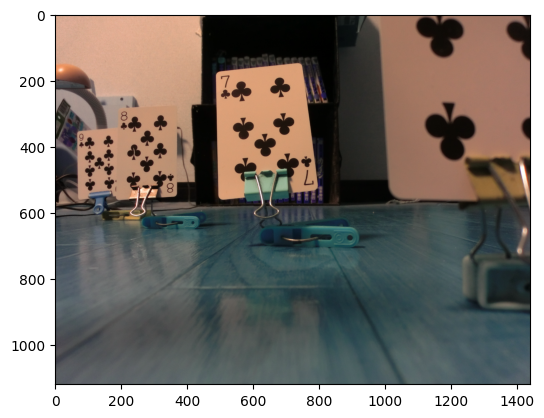

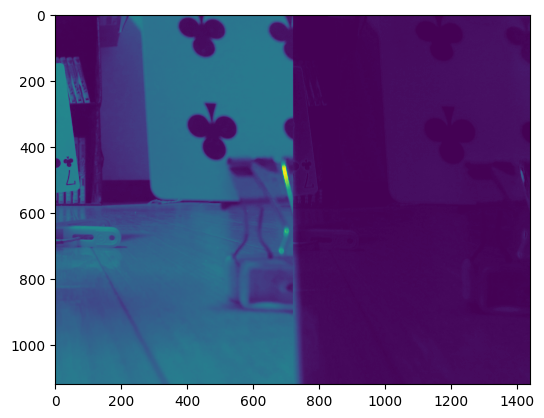

blue  Mean value for normal lens image: 71.9441
blue  Mean value for filtered lens image: 5.9613543
blue  Channel Transmittance: 0.08286092


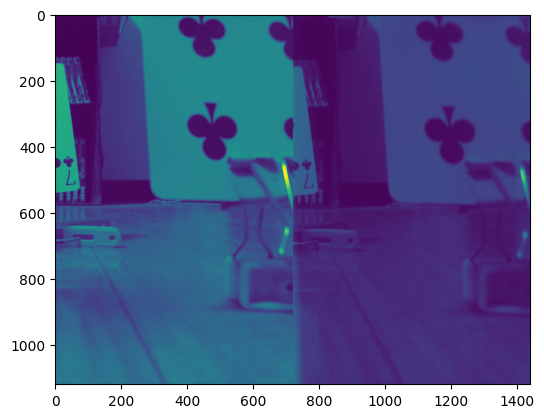

green  Mean value for normal lens image: 77.59884
green  Mean value for filtered lens image: 33.712826
green  Channel Transmittance: 0.43445012


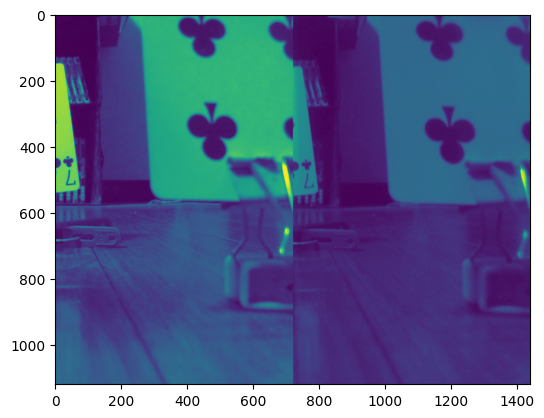

red  Mean value for normal lens image: 81.90956
red  Mean value for filtered lens image: 44.59786
red  Channel Transmittance: 0.5444768
(1920, 2560, 3)


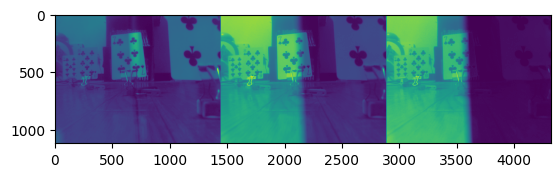

(<matplotlib.image.AxesImage at 0x7fc4ed1df6d0>, None)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim
from PIL import Image

from RGBTransmittance import transparency
from formula import formula_bsize

def load(path):
    image = cv2.imread(path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image.shape)
    image = cv2.resize(image, (1440, 1120))
    return image/255

    
original = 'ori2.JPG'
tname = 't2.JPG'


image = load(original)
plt.imshow(image),plt.show()
transparency(tname, original, types=0)
transparency(tname, original, types=1)
transparency(tname, original, types=2)

# show each channel individually
image = load(tname)
(B, G, R) = cv2.split(image)
pack = np.hstack([B, G, R])
plt.imshow(pack),plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1920, 2560, 3)


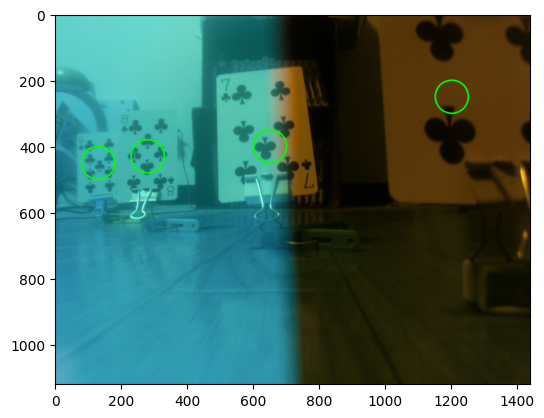

(<matplotlib.image.AxesImage at 0x7fc4ed17afa0>, None)

In [2]:
img = load('t2.JPG')
(B, G, R) = cv2.split(img)


cv2.circle(img, center=(130, 450), radius=50, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_4,shift=0)
cv2.circle(img, center=(280, 430), radius=50, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_4,shift=0)
cv2.circle(img, center=(650, 400), radius=50, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_4,shift=0)
cv2.circle(img, center=(1200, 250), radius=50, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_4,shift=0)


plt.imshow(img),plt.show()

(1920, 2560, 3)
(1920, 2560, 3)


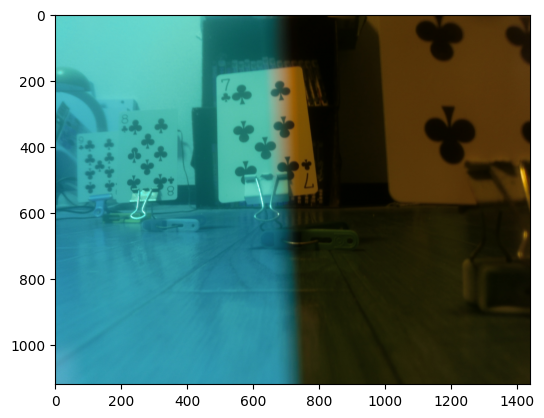

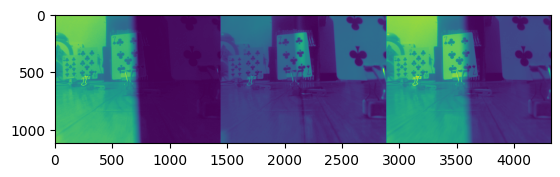

left 1


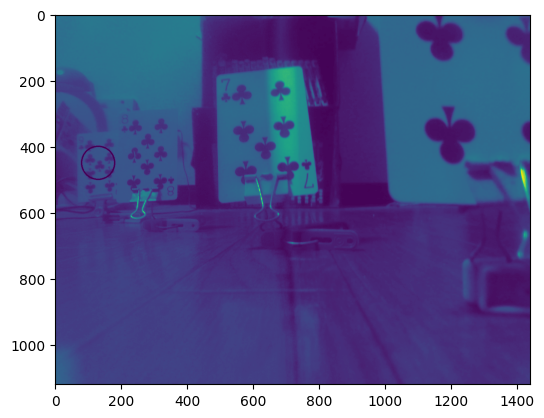

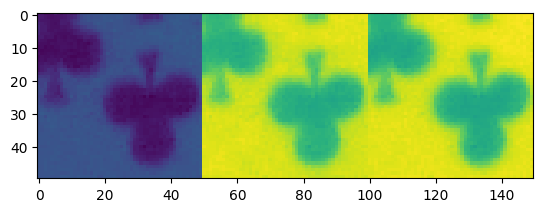

ori, g 0.0 1.0
ori, r 25.894117647058813 0.9799560612659851
ori, b 1029.2980392156865 0.5563575855001975
b -0.7260000000000006
left 2


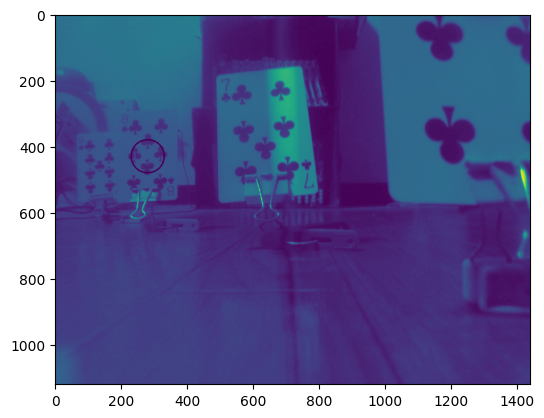

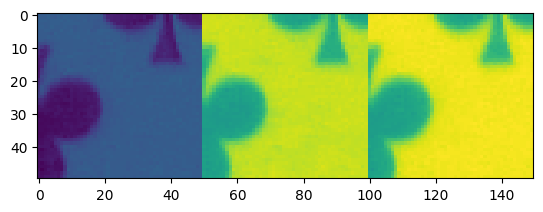

ori, g 0.0 1.0
ori, r 83.28627450980396 0.9772195139003034
ori, b 1046.4392156862746 0.5950702217920127
b 2.2034999999999996
right 1


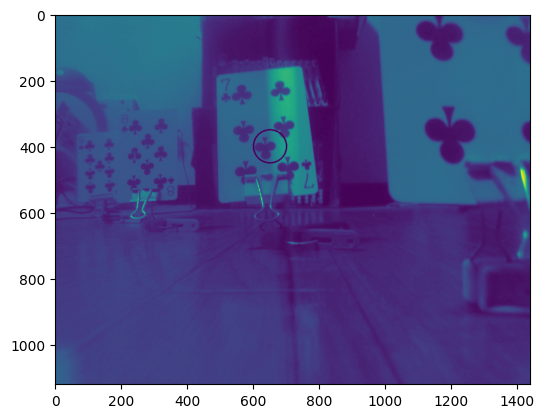

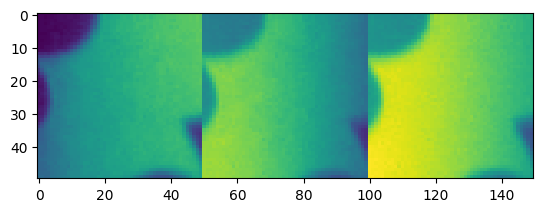

ori, g 0.0 1.0
ori, r 256.74901960784314 0.9521320462688261
ori, b 397.89803921568625 0.7029412378801965
b 2.9279999999999995
Right 2


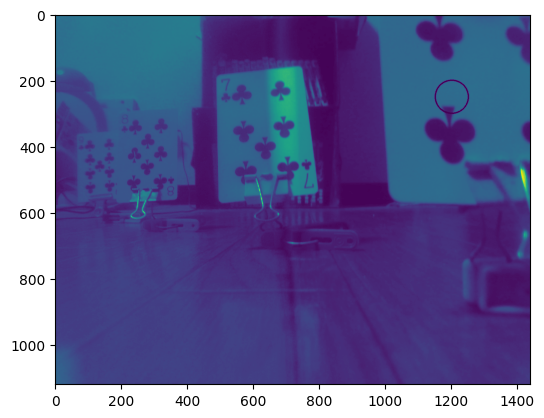

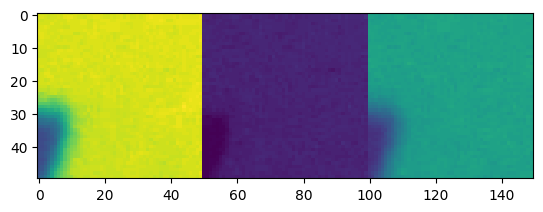

ori, g 0.0 1.0
ori, r 413.43137254901967 0.32622694973638466
ori, b 323.2352941176471 0.8713339291651647
b 3.2744999999999993


In [3]:

def block_ssim(x, ori, B, G, R, pt1, pt2, block_size):
    (_, oriG, _) = cv2.split(image)
    copy = B.copy()
    cv2.circle(copy, center=(pt1, pt2), radius=50, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_4,shift=0)
    plt.imshow(copy),plt.show()
    p = block_size
    pB = B[pt2:pt2+p, pt1:pt1+p]
    pR = R[pt2:pt2+p, pt1:pt1+p]
    pG = G[pt2:pt2+p, pt1:pt1+p]
    oriG = oriG[pt2:pt2+p, pt1:pt1+p]
    ps = np.hstack([pB, pR, pG])
    plt.imshow(ps),plt.show()
    print("ori, g", np.sum(abs(pG-oriG)), ssim(pG, oriG, data_range=1))
    #plt.imshow(pG-oriG),plt.show()
    print("ori, r", np.sum(abs(pR-oriG)), ssim(pR, oriG, data_range=1))
    #plt.imshow(pR-oriG),plt.show()
    print("ori, b", np.sum(abs(pB-oriG)), ssim(pB, oriG, data_range=1))
    #plt.imshow(pB-oriG),plt.show()
    formula_bsize(x)
    #ssims = ssim(pG, pB, data_range=1) + ssim(pG, pR, data_range=1) + ssim(pB, pR, data_range=1)
    #print("r, g, b ssim, close to 0 is more similar", 3-ssims)

psize=50
image = load('t2.JPG')
ori = load('ori2.JPG')
plt.imshow(image),plt.show()
(B, G, R) = cv2.split(image)

# show each channel individually
pack = np.hstack([R, B, G])
plt.imshow(pack),plt.show()
print("left 1")
block_ssim(65, ori, B, G, R, pt1=130, pt2=450, block_size=psize)
print("left 2")
block_ssim(165, ori, B, G, R, pt1=280, pt2=430, block_size=psize)
print("right 1")
block_ssim(265, ori, B, G, R, pt1=650, pt2=400, block_size=psize)
print("Right 2")
block_ssim(365, ori, B, G, R, pt1=1200, pt2=250, block_size=psize)